In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, tests_carried_out, daily_vaccinations, population_vaccinated, unique_people_tested
from heatmap import heatmap
from maps import case_maps
from phe import *
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
111,889 cases (7 day average) as of Tue 28 Dec, +5,041.1 since Mon 27 Dec
1,822 hospitalised (7 day average) as of Fri 31 Dec, +231.9 since Wed 29 Dec
100 died (7 day average) as of Tue 28 Dec, +7.6 since Mon 27 Dec


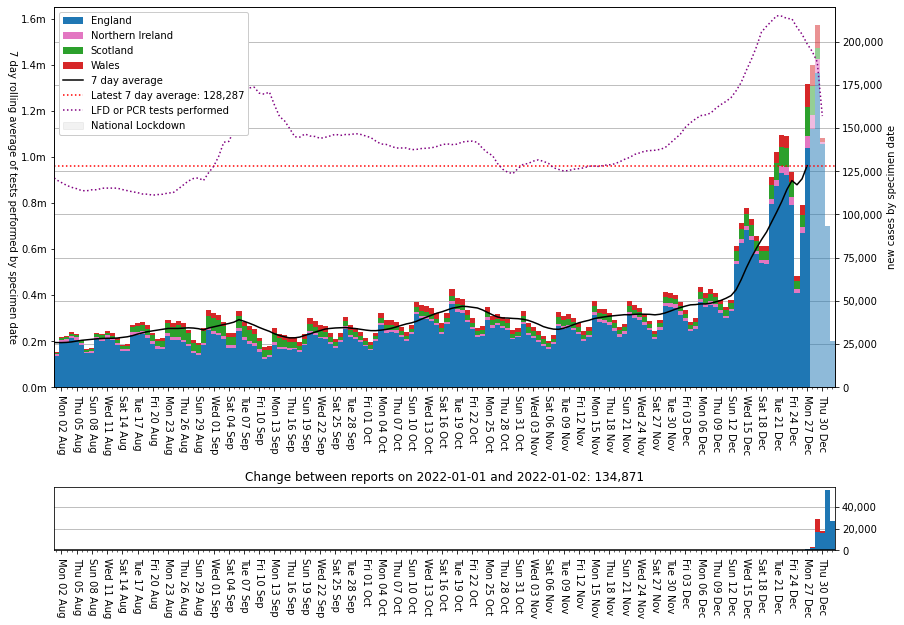

In [3]:
plot_areas(for_date, 'cases_nations', date_format='%a %d %b', earliest='2021-08', diff_ylims=None)

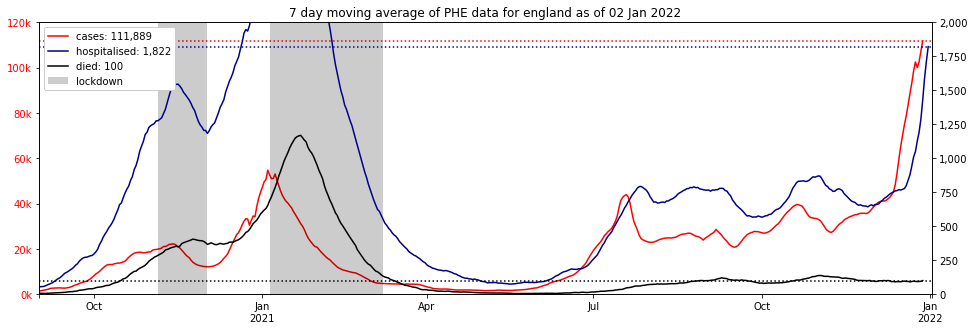

In [4]:
plot_summary(earliest_date='2020-09-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=120_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=2000)

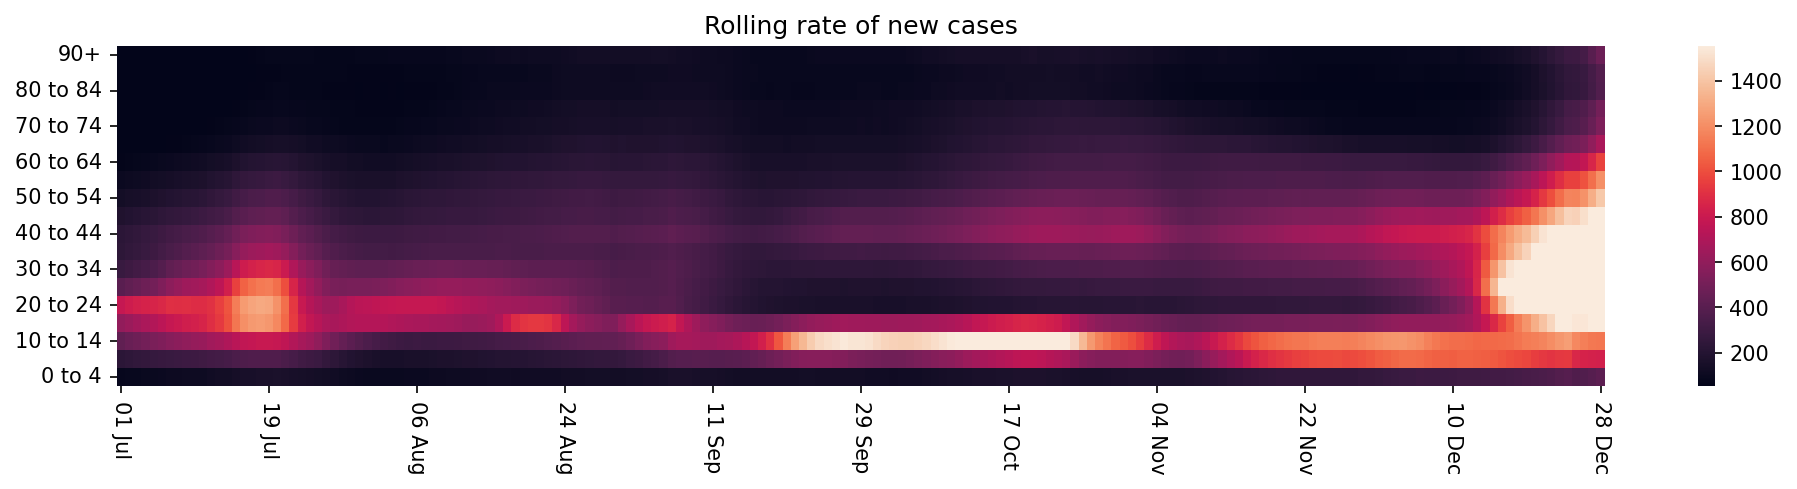

In [5]:
data = load_demographic_data('case_demographics_nation', 'England', 'rollingRate', start='2021-07')[0]
heatmap(data, title='Rolling rate of new cases', figsize=(16, 3))

In [6]:
demographic_stream_plot('Growth of Rate of New Cases', order=2, figsize=(16, 4))

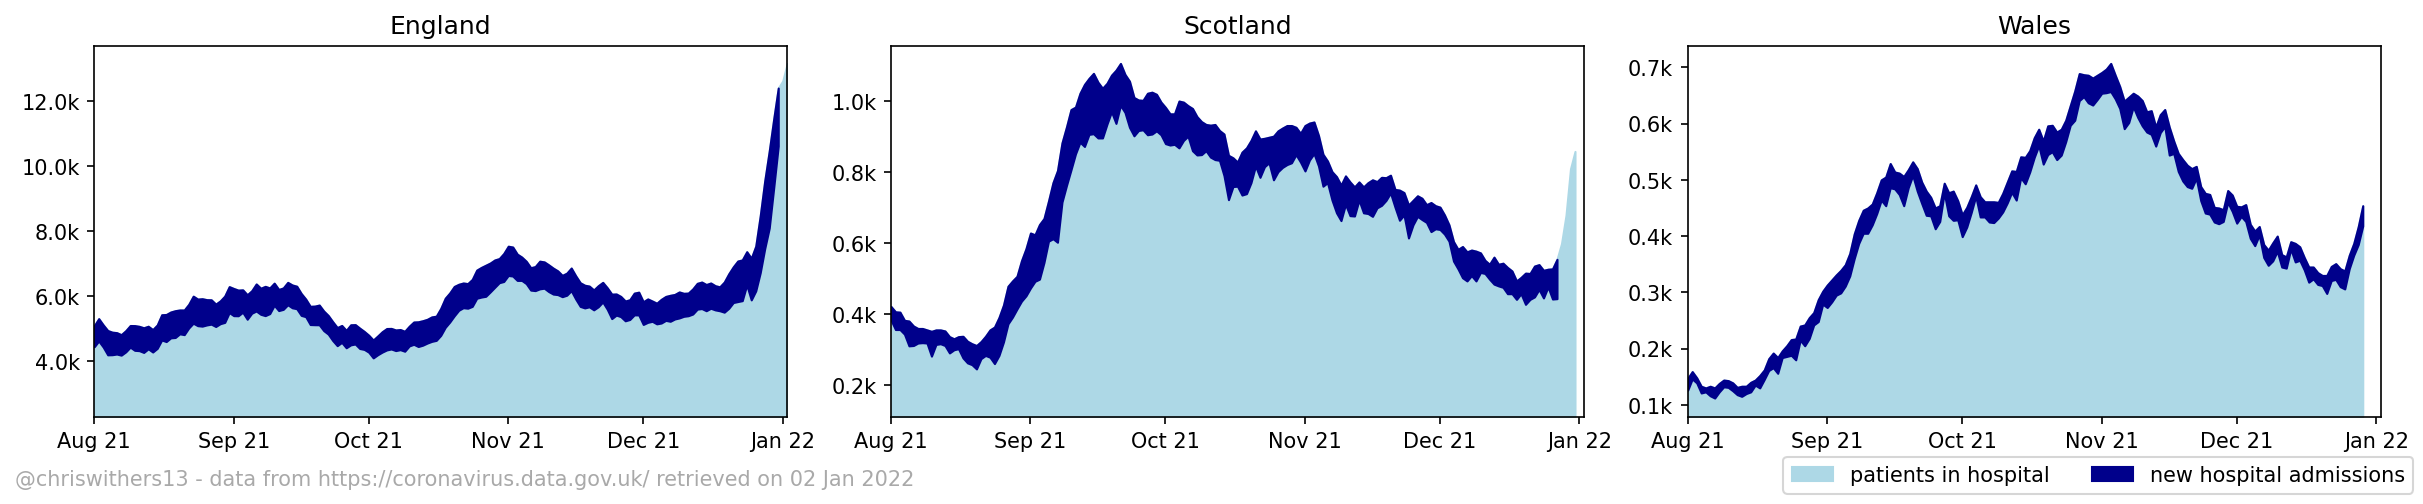

In [7]:
hospital_plot(start='2021-08', figsize=(16,3), figs=(1, 3), ymin=None)

In [8]:
plot_areas(for_date, areas=my_areas, lines=unique_people_tested)

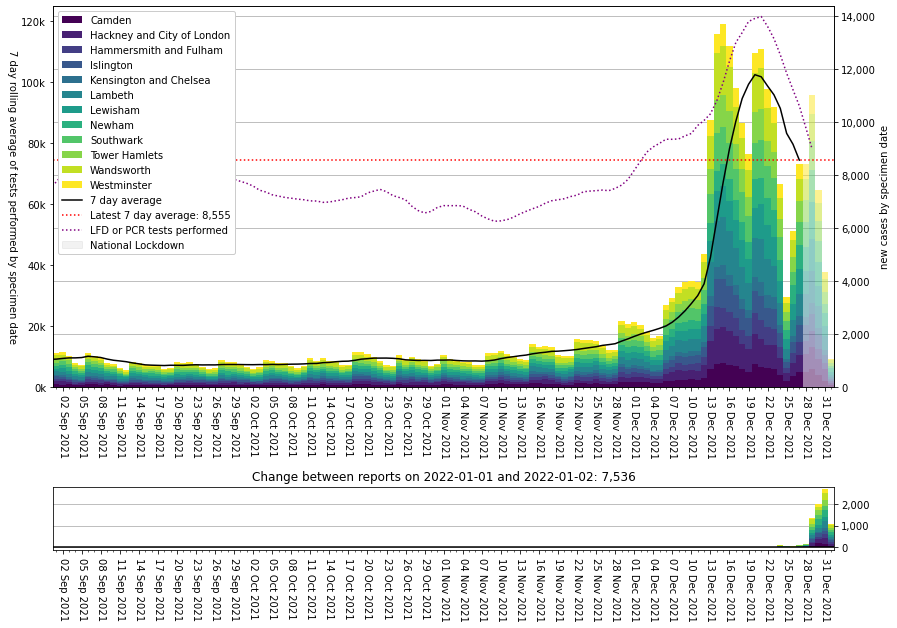

In [9]:
plot_areas(for_date, areas=london_areas, earliest='2021-09', lines=tests_carried_out)

In [10]:
data = recent_cases_summed(days=7, exclude_days=1)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [11]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  \
areaCode                                                 
E07000029                 Copeland         2711.819662   
E07000027        Barrow-in-Furness         2639.860401   
N09000005  Derry City and Strabane         2623.542476   
E08000013               St. Helens         2298.086774   
E07000034             Chesterfield         2242.135367   
E08000010                    Wigan         2212.303217   
E06000006                   Halton         2198.439070   
E07000073                   Harlow         2164.999368   
E08000011                 Knowsley         2161.578131   
E07000026                Allerdale         2140.935547   

           newCasesBySpecimenDate Specimen date  
areaCode                                         
E07000029                  1849.0    2021-12-31  
E07000027                  1770.0    2021-12-31  
N09000005                  3969.0    2021-12-31  
E08000013                  4150.0    2021-12-31  
E07000034                  2352.0    2021-12-31  
E08000010                  7271.0    2021-12-31  
E06000006                  2845.0    2021-12-31  
E07000073                  1885.0    2021-12-31  
E08000011                  3261.0    2021-12-31  
E07000026                  2093.0    2021-12-31

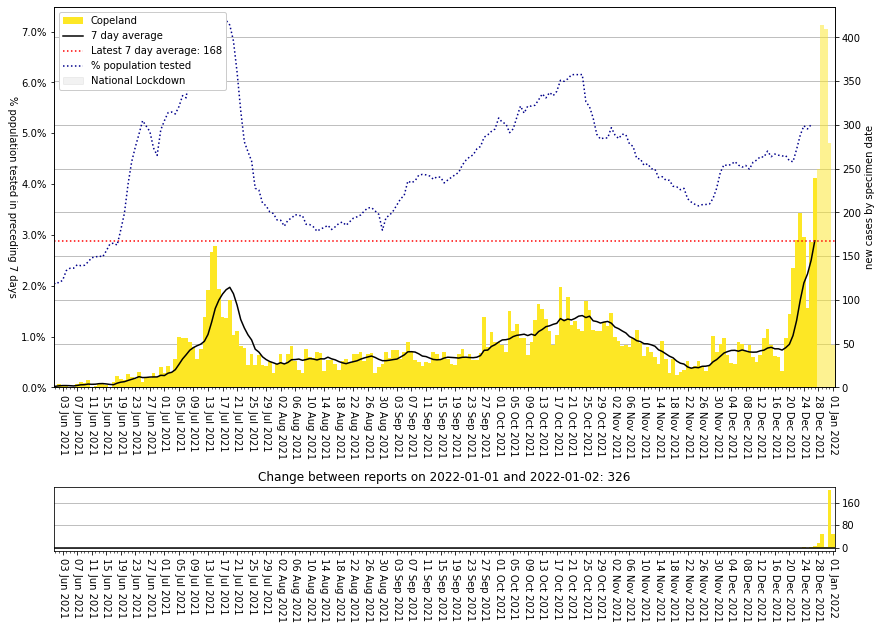

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [13]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  newCasesBySpecimenDate  \
areaCode                                                               
E08000025     Birmingham         1222.438642                 13958.0   
E08000035          Leeds         1529.618390                 12132.0   
E08000012      Liverpool         1947.024548                  9697.0   
E08000019      Sheffield         1592.365945                  9313.0   
E08000003     Manchester         1658.111124                  9167.0   
E08000010          Wigan         2212.303217                  7271.0   
E06000047  County Durham         1366.738729                  7245.0   
S12000049   Glasgow City         1092.367956                  6916.0   
E09000008        Croydon         1780.145329                  6884.0   
E08000015         Wirral         2120.915648                  6872.0   

          Specimen date  
areaCode                 
E08000025    2021-12-31  
E08000035    2021-12-31  
E08000012    2021-12-31  
E08000019    2021-12-31  
E08000003    2021-12-31  
E08000010    2021-12-31  
E06000047    2021-12-31  
S12000049    2021-12-30  
E09000008    2021-12-31  
E08000015    2021-12-31

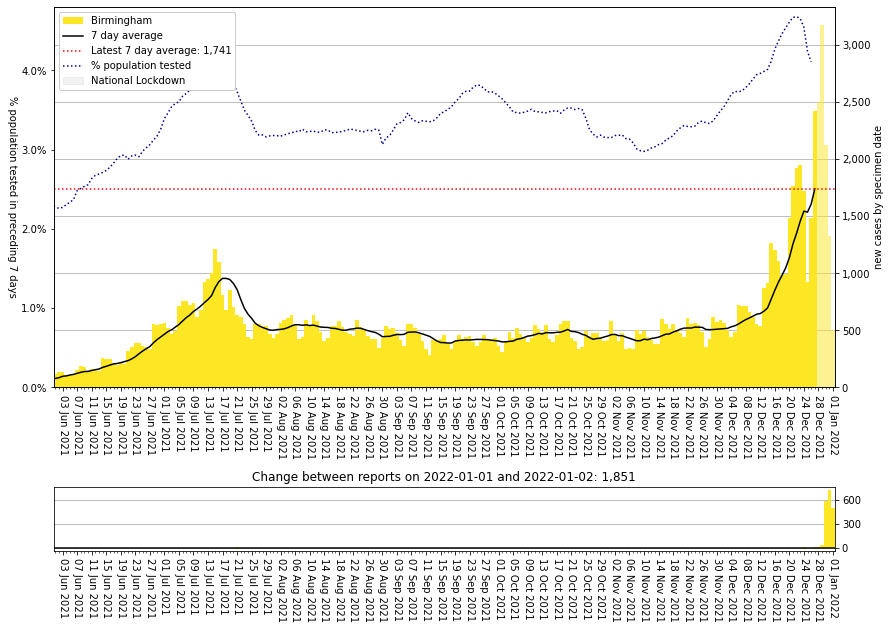

In [14]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

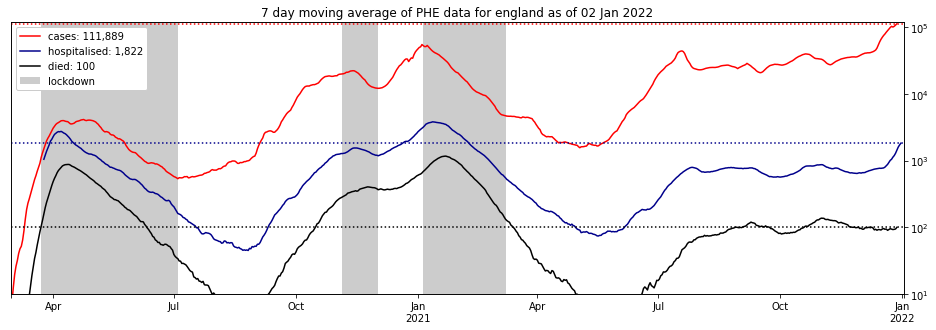

In [15]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

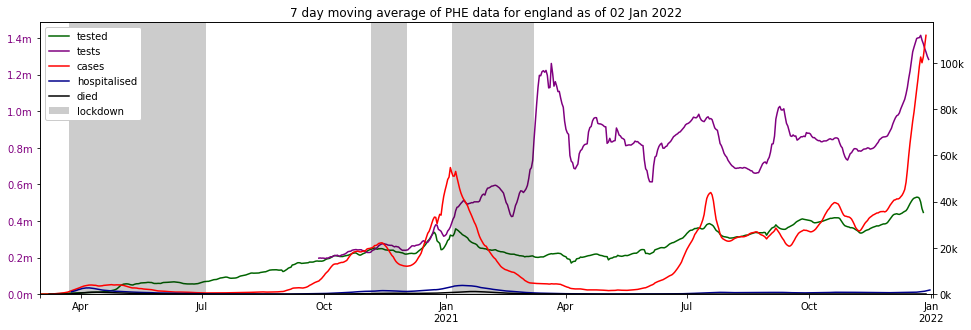

In [16]:
plot_summary(left_series=(s.unique_people_tested_sum, s.reported_virus_tests_sum), left_formatter=per1m_formatter,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

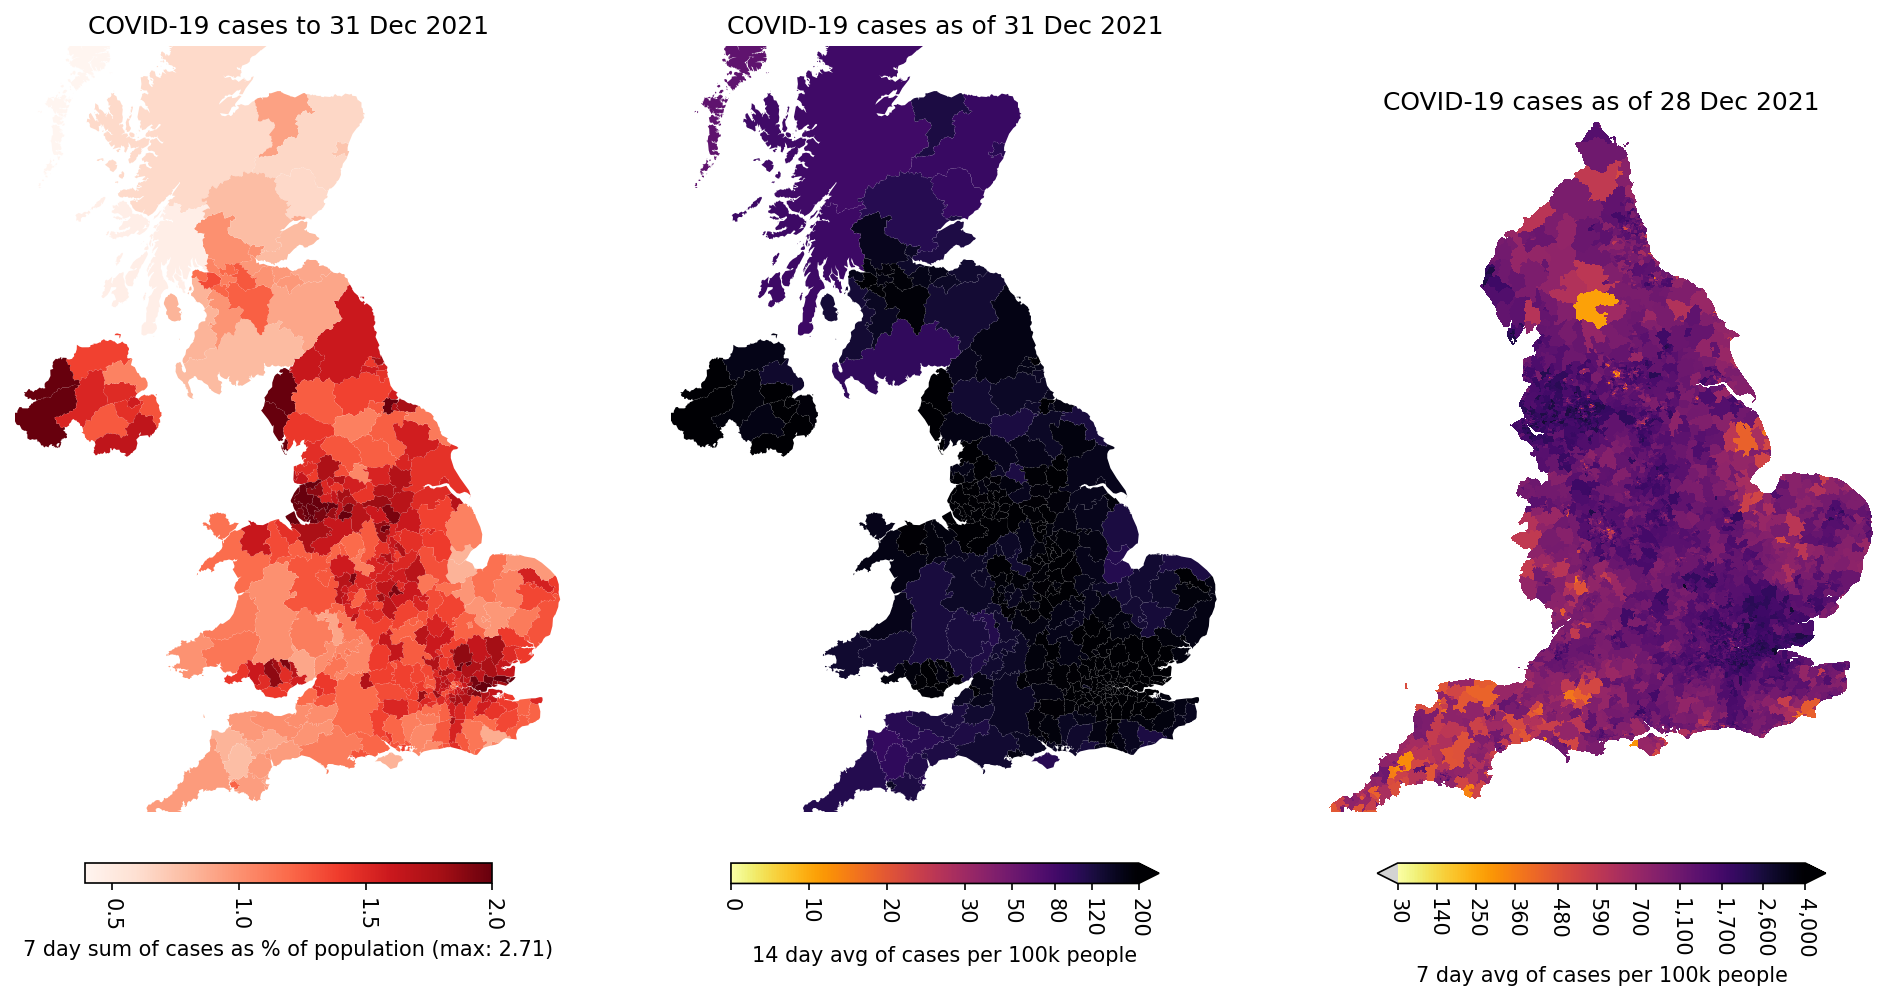

Loading BokehJS ...

In [17]:
case_maps(sum_vmax=2, exclude_days=1)